<a href="https://colab.research.google.com/github/wordsbyanmol/PUS2024_AArora/blob/main/HW3(Water_Consumption)_Arora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTIVARIATE LINEAR REGRESSION

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1) read in the data
read in the data on water consumption, I extracted it from https://www.mdpi.com/2079-9276/8/3/156 and saved it in HW3 as water_consumption.csv

We are going back to this problem after we study Classification and Regression Trees and we will try to model this data with an Random Forest

In [78]:
#download csv file
fname= "https://raw.githubusercontent.com/fedhere/PUS2024/refs/heads/main/HW3/water_consumption.csv"

In [79]:
import pandas as pd
df = pd.read_csv(fname, index_col=0)

In [80]:
df.head()

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15,24.336416,6.481994,0.659460,502348.816168,197168.749996,37.706850,2.960570e+06,0.677396,0.640112
2010-08-29,2010-08-29,25.037518,10.852795,0.659460,502348.816168,198457.438148,35.784861,2.965557e+06,5.821554,0.641042
2010-09-12,2010-09-12,25.037518,10.832737,0.659460,502348.816168,198457.438148,41.619670,2.965557e+06,22.124608,0.641042
2010-09-26,2010-09-26,25.037518,12.346707,0.658733,513199.230595,200091.929540,47.335604,2.977833e+06,22.982144,0.641244
2010-10-10,2010-10-10,25.104217,13.063567,0.658733,513199.230595,201419.215320,52.424959,2.977833e+06,75.940850,0.641244


the first column is a date. To ensure it as read in _as a date variable_ force a conversion to datetime

In [81]:
# prompt: convert the second column of df to datetime

df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])

In [82]:
df. head ()

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15 00:00:00,24.336416,6.481994,0.659460,502348.816168,197168.749996,37.706850,2.960570e+06,0.677396,0.640112
2010-08-29,2010-08-29 00:00:00,25.037518,10.852795,0.659460,502348.816168,198457.438148,35.784861,2.965557e+06,5.821554,0.641042
2010-09-12,2010-09-12 00:00:00,25.037518,10.832737,0.659460,502348.816168,198457.438148,41.619670,2.965557e+06,22.124608,0.641042
2010-09-26,2010-09-26 00:00:00,25.037518,12.346707,0.658733,513199.230595,200091.929540,47.335604,2.977833e+06,22.982144,0.641244
2010-10-10,2010-10-10 00:00:00,25.104217,13.063567,0.658733,513199.230595,201419.215320,52.424959,2.977833e+06,75.940850,0.641244


In [83]:
#using df.info you get the data type for each feature (=column) - datetime sows as "object"
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 2010-08-15 to 2018-02-18
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   197 non-null    object 
 1   Max_Temperature        197 non-null    float64
 2   Min_Temperature        197 non-null    float64
 3   HDI                    197 non-null    float64
 4   Household_Connections  197 non-null    float64
 5   Water_Consumption      197 non-null    float64
 6   Humidity               197 non-null    float64
 7   Population             197 non-null    float64
 8   Rainfall               197 non-null    float64
 9   Windspeed              197 non-null    float64
dtypes: float64(9), object(1)
memory usage: 16.9+ KB


plot all fratures against Date. Note, to see all plots in a single window I created a 3x4 matrix of axes. First I create a figure of the appropriate size with `plt.figure(figsize=(15, 10))`. Then I populate each subplot with `ax = plt.subplot(3, 4, 1)`: this sets the specific subplot to the axis object called `ax`. The numbre in parenthesis are: the number of axes rows (3), the number of axes columns (4) and the specific subplot number, counted let to right and top to bottom. I put the target variable in the top left (subplot 1) with `ax = plt.subplot(3, 4, 1)`

I want **you** to plot all other variables in the second and third row: start with `ax = plt.subplot(3, 4, 5)` and go through `ax = plt.subplot(3, 4, 12)`, changing the name of the variable to be plotted


# 2) Descriptive statistics

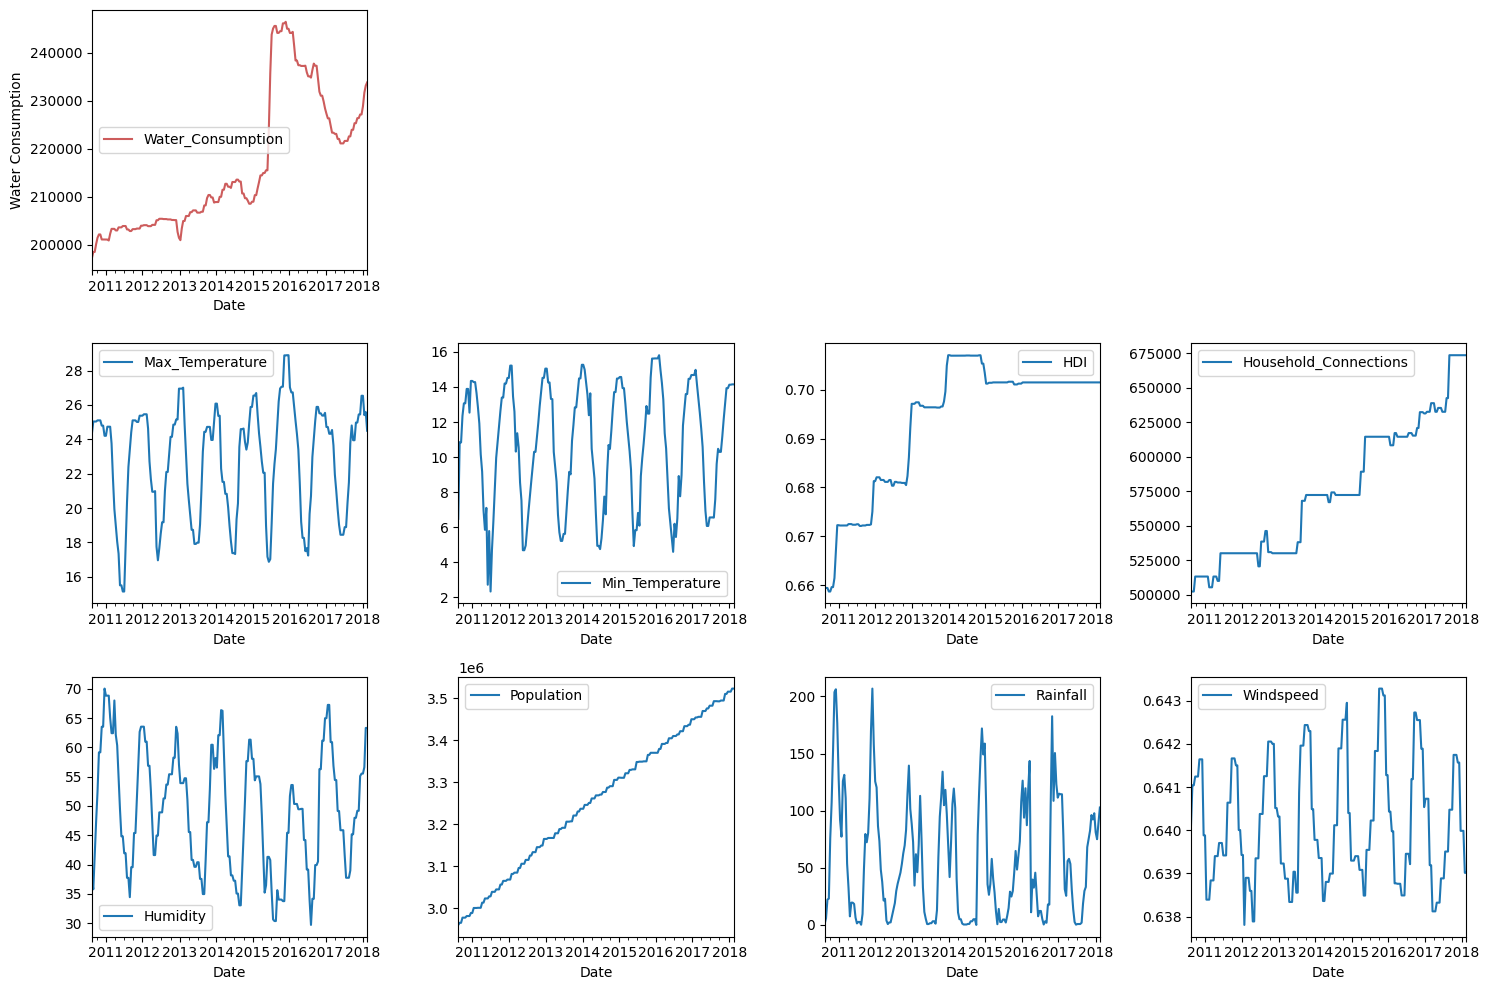

In [84]:
import matplotlib.pyplot as plt

column_names = df.columns

plt.figure(figsize=(15, 10))
ax = plt.subplot(3, 4, 1)
df.plot('Date', 'Water_Consumption', ax=ax, color='IndianRed')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plus = 4
for i in range(1,10):
  if i == 5:
    plus = 3
    continue
  else:
    ax = plt.subplot(3, 4, i+plus)
    df.plot('Date', column_names[i], ax=ax)
plt.tight_layout()
plt.show()

### CAPTION HERE

The image displays line plots depicting the trends of various environmental, demographic, and infrastructure variables over time. The data spans from 2011 to 2018. The X column represents data in years while the Y column represents each of the feature value. We can see fluctuation in all feature values over the years. The variables plotted include:

Water Consumption: A general increase is observed with a peak in 2015 followed by a decline.
Max Temperature: Fluctuates seasonally, with generally increasing temperatures over the years.
Min Temperature: Similar seasonal patterns to Max Temperature, with a slight increase over time.
HDI: Shows a steady increase, indicating improved human development.
Household Connections: A gradual increase is observed, suggesting expanding infrastructure.
Population: A steady increase is seen, indicating population growth.
Rainfall: Fluctuates annually, with no clear trend over the entire period.
Windspeed: Shows variability with no consistent trend.
Humidity: Fluctuates seasonally, with a slight increase in recent years.


In [85]:
# use the method describe to see the statistical properties of the dataframe
# Calculate descriptive statistics
summary_stats = df.describe()
print(summary_stats)

       Max_Temperature  Min_Temperature         HDI  Household_Connections  \
count       197.000000       197.000000  197.000000             197.000000   
mean         22.820151        10.755184    0.693206          575469.302905   
std           3.214211         3.450827    0.013474           48696.828622   
min          15.146338         2.336682    0.658733          502348.816168   
25%          20.275245         7.596494    0.681300          530077.653037   
50%          23.964625        11.355749    0.701456          572273.709141   
75%          25.104217        13.930920    0.701474          614469.765245   
max          28.896027        15.808946    0.707032          673544.243791   

       Water_Consumption    Humidity    Population    Rainfall   Windspeed  
count         197.000000  197.000000  1.970000e+02  197.000000  197.000000  
mean       216086.151748   49.327576  3.253261e+06   56.300944    0.640164  
std         14132.209414   10.165083  1.627993e+05   52.049954    

The describe function displays summary statistics of the dataframe including mean, std, min, etc.

**Plot** a histogram of each feature separately. Comment on the distributions: e.g., which are bell shaped, which are multi-peaked, anything you think is notable

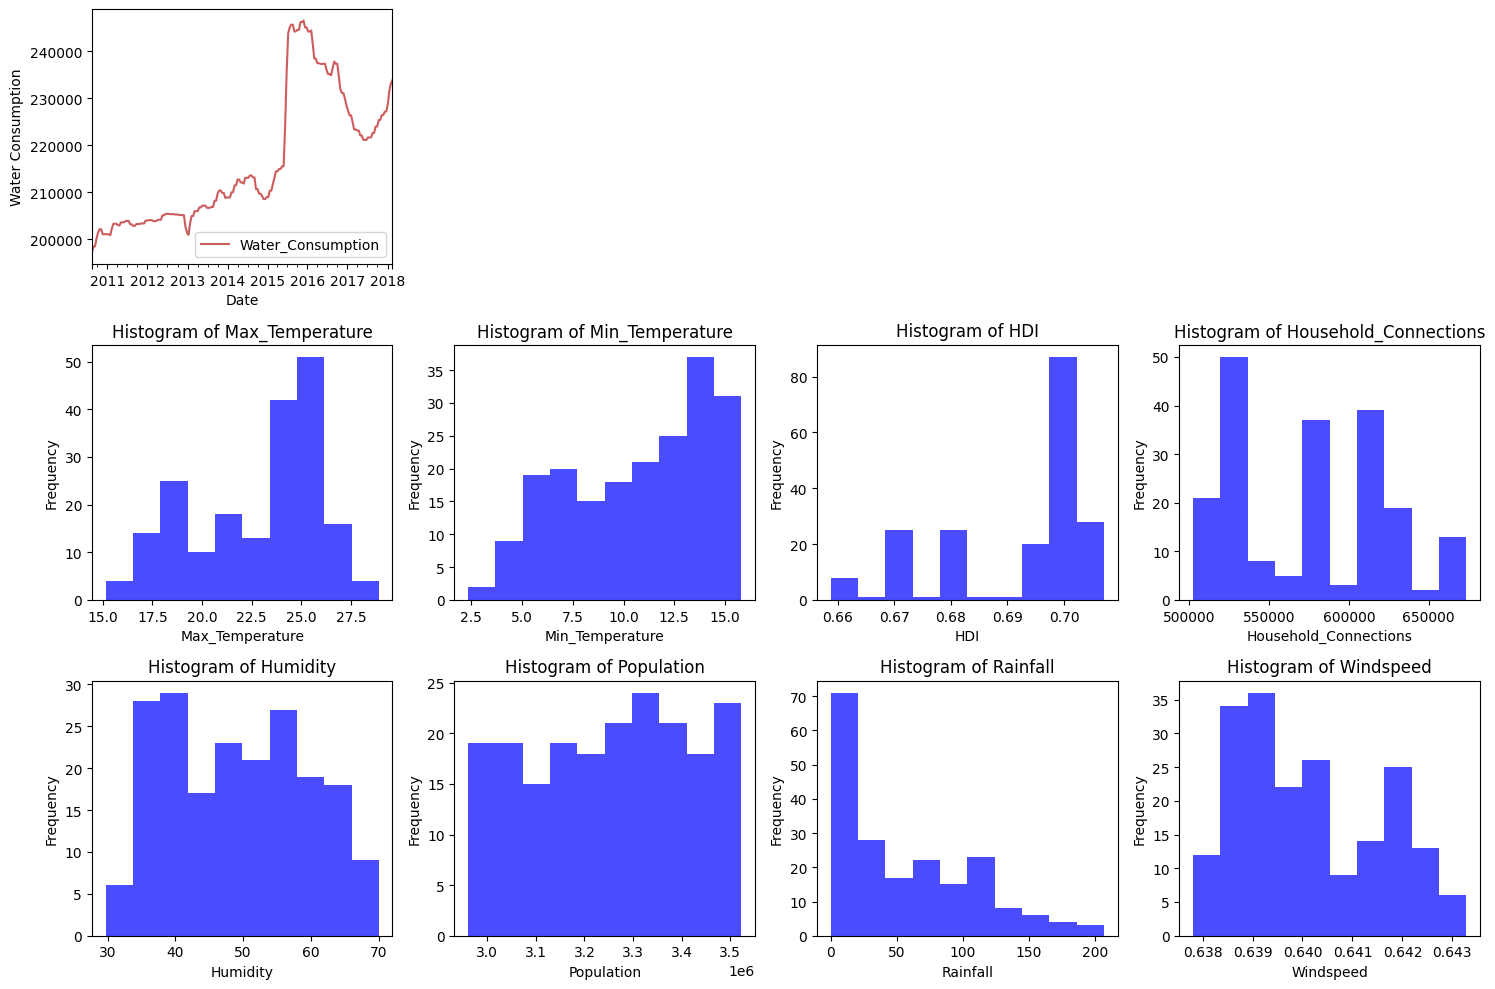

In [86]:
import matplotlib.pyplot as plt

column_names = df.columns

plt.figure(figsize=(15, 10))

# Set the figure size here
ax = plt.subplot(3, 4, 1)
df.plot('Date', 'Water_Consumption', ax=ax, color='IndianRed')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plus = 4

for i in range(1, 10):
  if i == 5:
    plus = 3
    continue
  else:
    ax = plt.subplot(3, 4, i+plus)
    # Plot a histogram for the current column
    plt.hist(df[column_names[i]], bins=10, color='blue', alpha=0.7)
    plt.xlabel(column_names[i])
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_names[i]}')

plt.tight_layout()
plt.show()

The histograms represent the frequency of each feature. The Y label represents frequency and the X label particular features.

The histogram of Max temperature is left skewed. This suggests that the majority of the recorded temperatures fall within this range.

The histogram of Min temperature is left-skewed and multi-peaked. The majority of the recorded temperatures fall within the range of 7.5 to 15.

The histogram of HDI is left-skewed. This suggests that the majority of the homes fall in the HDI category above 0.69.

The histogram of Household Connection is right-skewed. The distribution is spread across a wide range of household connections, with two peaks: around 550,000 and 625,000 connections.This could indicate areas with varying levels of access to water services.

The histogram of Humidity is relatively symmetrical with small peaks. The histogram is fairly uniform with some slight variation between 30% and 70% humidity, indicating that the region has varied humidity levels, potentially with both dry and humid conditions.

The histogram of Population standardised has multiple peaks. Its distribution ranges evenly between 3-3.5.  There are more frequent occurrences of higher population densities, with a few outliers indicating exceptionally high population concentrations.

The histogram of rainfall is right skewed with long tail.  Rainfall is likely clustered around certain levels, with a longer tail indicating occasional heavy rainfall events.

The histogram of windspeed is right skewed with possible outlier on the right. Windspeed is narrowly distributed, with most values concentrated around 0.640.


### CAPTION HERE

# 3) Exploratory data analysis

Look at the correlation of the variables, pay attention to what is linearly correlatefd with the Water Consumption. If we had a single variable with high linear correlation with the target, we could try a univariate linear regression.

In [87]:
df.iloc[:,1:].corr()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Max_Temperature,1.000000,0.894710,0.042989,0.136172,0.160549,0.335020,0.098926,0.588840,0.494267
Min_Temperature,0.894710,1.000000,0.025292,0.064923,0.055879,0.643721,0.037800,0.758492,0.288344
HDI,0.042989,0.025292,1.000000,0.714116,0.594874,-0.207362,0.834549,-0.136051,-0.024970
Household_Connections,0.136172,0.064923,0.714116,1.000000,0.811606,-0.177808,0.961420,-0.046897,0.096903
Water_Consumption,0.160549,0.055879,0.594874,0.811606,1.000000,-0.312399,0.793164,-0.064579,0.171201
Humidity,0.335020,0.643721,-0.207362,-0.177808,-0.312399,1.000000,-0.193239,0.723015,-0.143531
Population,0.098926,0.037800,0.834549,0.961420,0.793164,-0.193239,1.000000,-0.087344,0.044513
Rainfall,0.588840,0.758492,-0.136051,-0.046897,-0.064579,0.723015,-0.087344,1.000000,0.262433
Windspeed,0.494267,0.288344,-0.024970,0.096903,0.171201,-0.143531,0.044513,0.262433,1.000000


Based on the correlation matrix provided, the variable with the highest linear correlation with Water Consumption is Household Connections, with a correlation coefficient of 0.8116. This is a strong positive correlation, suggesting that as the number of household connections increases, water consumption also increases.

R² (Coefficient of Determination) for a simple linear regression is the square of the correlation coefficient between the target (Water Consumption) and the predictor (Household Connections).

Given that the correlation is 0.8116, the maximum 𝑅2
for a univariate linear regression using Household Connections as the predictor would be: R2=(0.8116)2=0.6587


# 3) Linear Regression

## 3A) Univariate model



```
# This is formatted as code
```

Start with a univariate linear regression, choose the variable with the highest coefficient. Choose whichever model you prefer.

In [88]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [89]:
# Select the target (Water_Consumption) and the highest correlated feature (Household_Connections)
X = df[['Household_Connections']]  # Predictor
y = df['Water_Consumption']        # Target

# Create and train the model using the entire dataset
model = LinearRegression()
model.fit(X, y)

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Print the R² score and MSE
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.6587042749519958
Mean Squared Error: 67817351.05835445


Text(0.5, 0, 'Date')

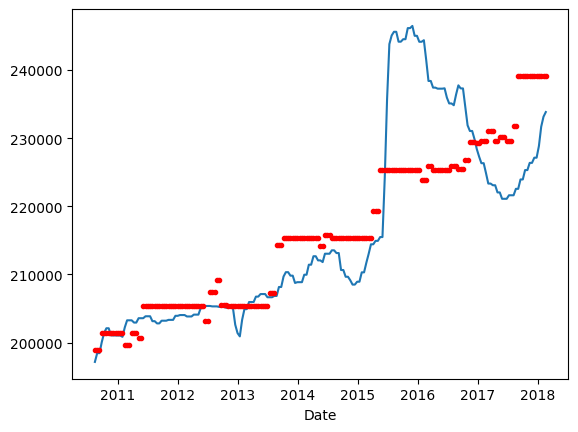

In [90]:
import pylab as plt
plt.plot(df['Date'], y)
plt.plot(df['Date'], y_pred, 'r.')
plt.xlabel('Date')

The plot shows a time series of Water Consumption (y-axis) over time (x-axis, labeled as "Date". Th blue line represents the observed water consumption over the years (from 2011 to 2018). The water consumption gradually increases over time, with notable jumps, especially between 2015 and 2016. After reaching a peak around 2016, the consumption begins to decline and then rises again slightly towards the end of 2017. The red dots shows the prediction made by linear regression using household connections at the feature.


The red dots are fairly flat in most areas, suggesting that the linear regression model’s predictions are relatively constant over time and not fully capturing the trend or the variability of the actual water consumption.

Model Fit: The red dots (predictions) do not follow the actual water consumption pattern very well. They are not responsive to the spikes or drops in the actual water consumption values. This implies that the model, which is based solely on Household Connections, does not fully explain the variance in water consumption.


#3B) multivariate model with statsmodels

One method for linear regression is the statsmodels Ordinary Least Square. I made the model below. Look at the P>|t| column of the report. NOTE: that represents the probability that "by chance" the variable would have that influence on the model, even if it did not explain the independent variable.

In [91]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable

import statsmodels.formula.api as smf

# Define the formula for the regression
formula = 'Water_Consumption ~ Max_Temperature + Min_Temperature + HDI + Household_Connections + Humidity + Population + Rainfall + Windspeed'

# Fit the model
model = smf.ols(formula, data=df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Water_Consumption   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     63.85
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.47e-49
Time:                        00:24:15   Log-Likelihood:                -2032.3
No. Observations:                 197   AIC:                             4083.
Df Residuals:                     188   BIC:                             4112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.818e+

look at the R^2 above, and at the P>|t|, what do they represent?

Assiming a p-value of 0.05, report in a cell of text below _which variables are significant in the fit_:


R square is 0.731 meaning 73.1 percent. This implies that these dependent variables together explain 73.1 percent variance in water consumption in this model.

P>∣t∣) represents the probability of observing the given result assuming that the null hypothesis is true. In the context of regression, the null hypothesis is that the coefficient of the predictor is zero, meaning the variable has no effect on the dependent variable (Water Consumption).

The significant variables include:

Max_temprature, min_temprature, HDI, Household Connections, humidity, population.

# 3C) Now use sklearn like in class and lets do things right! training-test split!


### 3C - 1)
First select the numerical columns and store them in a list called numerical_features

In [92]:
#use select type for numerical list
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Print the list of numerical features
print(numerical_features)

['Max_Temperature', 'Min_Temperature', 'HDI', 'Household_Connections', 'Water_Consumption', 'Humidity', 'Population', 'Rainfall', 'Windspeed']


In [93]:
# # prompt: whiten the dataframe


# # Select the numerical features
# numerical_features = ...
# numerical_features

### 3C - 2) standardize the features

NOTE THE NUMERICAL FEATURES: they live in very different regimes! for example household connections ins in the ~100,000, while wind speed is ~0.1.

Before modeling the data with a linear regression it is apprioriate to STANDARDIZE the features: subtracting the mean and dividing by the standard deviation, so that they are mean=0 std=1. Note: this does not change the **shape** of the distribution, it just translates it and shrinks it

Thankfully, sklearn offers a library of functions for preprocessing the data: standardize the features with sklearn StandardScaler. Like all sklearn functions, first create an object, then fit it to the data

In [94]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features
scaler.fit(df[numerical_features])

StandardScaler()

to generate the scaled features transform the original feature set

In [95]:
scaled_features = scaler.transform(df[numerical_features])
scaled_features

array([[ 0.47293977, -1.24146403, -2.51082218, ..., -1.80243935,
        -1.07137969, -0.03718638],
       [ 0.69162118,  0.02835829, -2.51082218, ..., -1.77172968,
        -0.97229672,  0.63119909],
       [ 0.69162118,  0.02253108, -2.51082218, ..., -1.77172968,
        -0.65827933,  0.63119909],
       ...,
       [ 0.80744552,  0.97968328,  0.61521731, ...,  1.6134208 ,
         0.36029122, -0.12687215],
       [ 0.86304614,  0.98521971,  0.61521731, ...,  1.65830416,
         0.6399626 , -0.82569644],
       [ 0.52422241,  0.98521971,  0.61521731, ...,  1.65830416,
         0.89472364, -0.82569644]])

Plot a histogram of each feature _after_ standardizing compare it to the plot above: is the shape the same? it sholud be identical! but the x-axis should be different

The plot below looks the same except the features have been standardised which makes their comparison easier.

In [96]:
# Convert scaled data back to a DataFrame for easy plotting
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)

In [97]:
scaled_df

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
0,0.472940,-1.241464,-2.510822,-1.505371,-1.342012,-1.146113,-1.802439,-1.071380,-0.037186
1,0.691621,0.028358,-2.510822,-1.505371,-1.250592,-1.335672,-1.771730,-0.972297,0.631199
2,0.691621,0.022531,-2.510822,-1.505371,-1.250592,-0.760205,-1.771730,-0.658279,0.631199
3,0.691621,0.462375,-2.564927,-1.281987,-1.134640,-0.196461,-1.696137,-0.641762,0.775965
4,0.712425,0.670640,-2.564927,-1.281987,-1.040482,0.305484,-1.696137,0.378289,0.775965
...,...,...,...,...,...,...,...,...,...
192,1.159218,0.922746,0.615217,2.019122,0.784153,0.610762,1.613421,0.797870,-0.126872
193,1.159218,0.979683,0.615217,2.019122,0.904887,0.610762,1.613421,0.476426,-0.126872
194,0.807446,0.979683,0.615217,2.019122,1.106537,0.719569,1.613421,0.360291,-0.126872
195,0.863046,0.985220,0.615217,2.019122,1.210660,1.379210,1.658304,0.639963,-0.825696


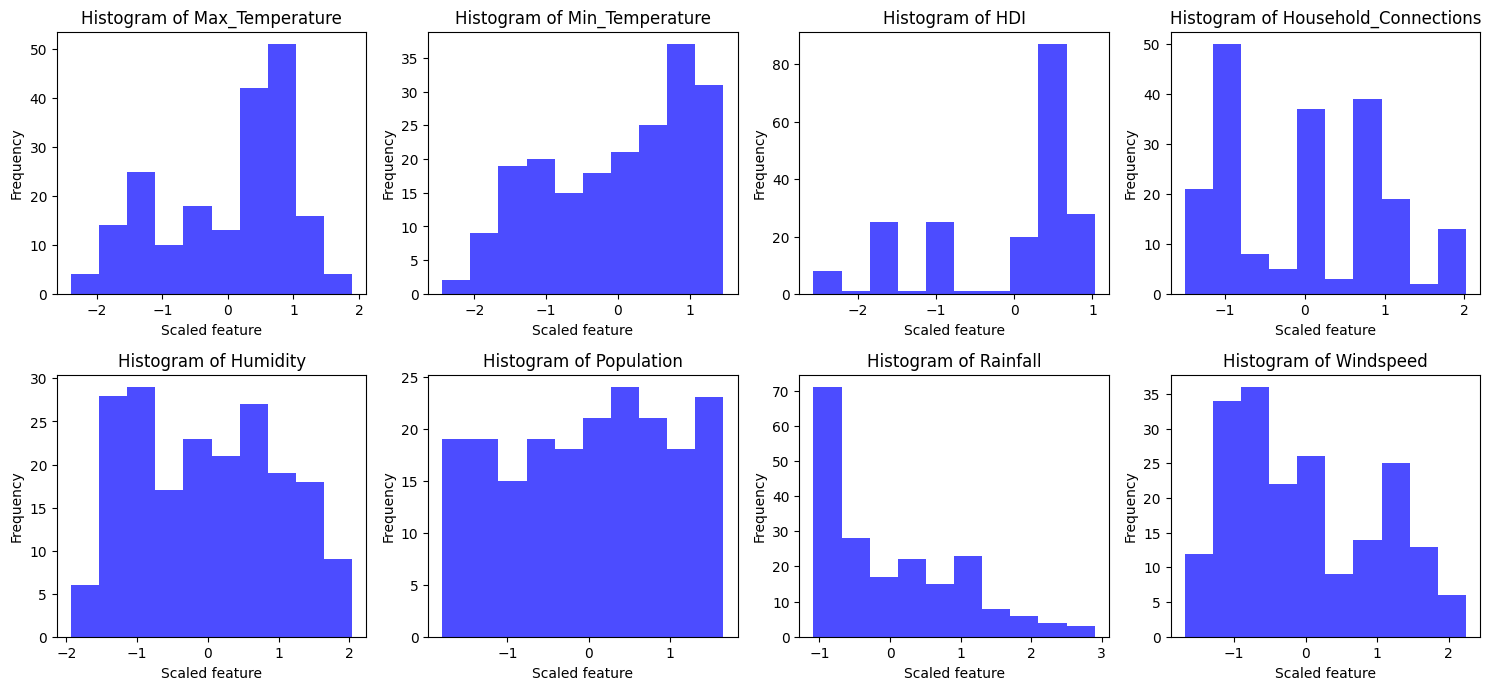

In [98]:
import matplotlib.pyplot as plt

# Assuming Water_Consumption is part of numerical_features and scaled_df
# First, exclude Water_Consumption from the columns list
features_to_plot = [col for col in scaled_df.columns if col != 'Water_Consumption']

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each column in features_to_plot and create a histogram
for i, column in enumerate(features_to_plot):
    ax = plt.subplot(3, 4, i + 1)
    ax.hist(scaled_df[column], bins=10, color='blue', alpha=0.7)
    ax.set_xlabel("Scaled feature")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram of {column}")

plt.tight_layout()  # Adjust spacing
plt.show()  # Display the plot


save the features in a new dataset

In [99]:
scaled_df

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
0,0.472940,-1.241464,-2.510822,-1.505371,-1.342012,-1.146113,-1.802439,-1.071380,-0.037186
1,0.691621,0.028358,-2.510822,-1.505371,-1.250592,-1.335672,-1.771730,-0.972297,0.631199
2,0.691621,0.022531,-2.510822,-1.505371,-1.250592,-0.760205,-1.771730,-0.658279,0.631199
3,0.691621,0.462375,-2.564927,-1.281987,-1.134640,-0.196461,-1.696137,-0.641762,0.775965
4,0.712425,0.670640,-2.564927,-1.281987,-1.040482,0.305484,-1.696137,0.378289,0.775965
...,...,...,...,...,...,...,...,...,...
192,1.159218,0.922746,0.615217,2.019122,0.784153,0.610762,1.613421,0.797870,-0.126872
193,1.159218,0.979683,0.615217,2.019122,0.904887,0.610762,1.613421,0.476426,-0.126872
194,0.807446,0.979683,0.615217,2.019122,1.106537,0.719569,1.613421,0.360291,-0.126872
195,0.863046,0.985220,0.615217,2.019122,1.210660,1.379210,1.658304,0.639963,-0.825696


look at the statistical properties of this new dataset with the method `describe`. Do they make sense?

After scaling, the mean values should typically be around 0. You may see that some of the scaled features center around 0 (like Rainfall), while others (like Water_Consumption) might have shifted due to standardization.
The standard deviation should be around 1 for scaled features.

This looks reasonable for standardized features. However, if some features like WindSpeed have strange values (for example, very close to zero or very large), it could indicate an issue like multicollinearity.

In [100]:
#statisical properties
scaled_df.describe()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,-5.906161e-16,-4.756488e-16,-3.678952e-15,7.934995e-16,-5.770905e-16,5.049542e-16,1.154181e-15,-8.115336e-17,-4.057668e-15
std,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00
min,-2.393547e+00,-2.445776e+00,-2.564927e+00,-1.505371e+00,-1.342012e+00,-1.934995e+00,-1.802439e+00,-1.085034e+00,-1.691723e+00
25%,-7.937844e-01,-9.176750e-01,-8.858643e-01,-9.345023e-01,-8.495739e-01,-8.681048e-01,-8.504396e-01,-9.392207e-01,-8.256964e-01
50%,3.569740e-01,1.744785e-01,6.138774e-01,-6.578941e-02,-4.095261e-01,8.012208e-03,9.447330e-02,-2.963264e-01,-2.026068e-01
75%,7.124252e-01,9.226273e-01,6.152173e-01,8.029235e-01,7.268914e-01,7.600314e-01,8.480413e-01,7.673965e-01,7.994209e-01
max,1.895133e+00,1.468239e+00,1.028777e+00,2.019122e+00,2.155878e+00,2.041346e+00,1.658304e+00,2.899909e+00,2.239020e+00


### 3C - 3) TRAIN-TEST SPLIT to avoid overfitting



In [101]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable with sklearn
from sklearn.model_selection import train_test_split

# Select the features (independent variables)
vars = numerical_features
X1 = scaled_df[vars]

# Select the target variable (dependent variable)
y = scaled_df['Water_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


### 3C -4) NOW FIT THE DATA WITH THE sklearn LinearRegression model

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model_multivariate = LinearRegression()

# Fit the model to the training data
model_multivariate.fit(X_train, y_train)

# Make predictions on the training data
y_pred_test = model_multivariate.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3857410911041378
R-squared: 0.6383344385984026


### 3C-5 Visualize the model

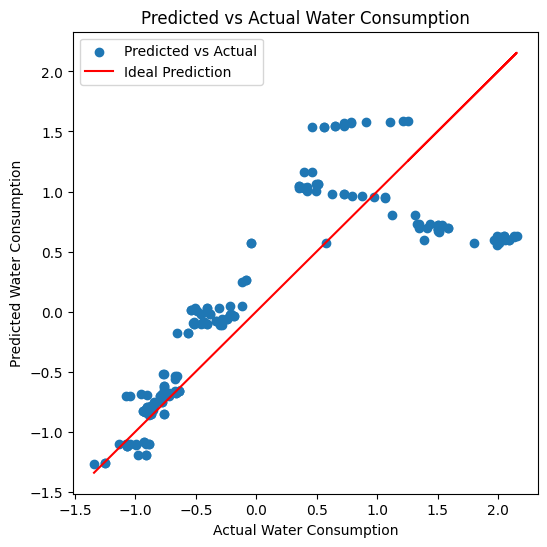

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Ensure you use the same features (X2) that were used to train the model
plt.scatter(y, model_multivariate.predict(X2), label='Predicted vs Actual')

# Plot the ideal prediction line (y = y), where the prediction would match exactly
plt.plot(y, y, color='red', label='Ideal Prediction')

plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.legend()
plt.show()


This plot shows the relationship between actual water consumpion and predicted values with x label as actual water consumption adn the y label as predicted water consumption. The blue dots being closely aligned along the  line suggests that the model's predictions are highly accurate, as the predicted values are very close to the actual values in the test data.

Text(0, 0.5, 'Water Consumption')

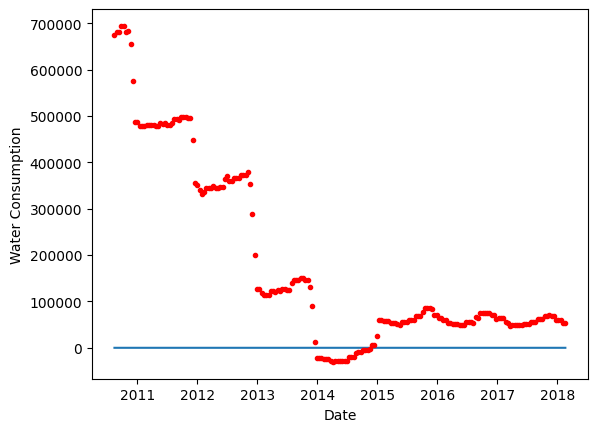

In [115]:

plt.plot(df['Date'], y)
plt.plot(df['Date'], model.predict(X1), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

Thie plot conveys the relationship between date in years (x label) and water consumption (Y label). The red dot represents model prediction which moved from high in 2011 into a decline where as the demand is flat at zero

## 3D) SIMPLIFY THE MODEL
 You can simplify the model! this is what they did in  https://www.mdpi.com/2079-9276/8/3/156



### 3D - 1) Only use the columns that have a correlation higher than 0.5  $r>0.5$ with Water_consumption

In [106]:
#select columns with high correlation
scaled_df.iloc[:,1:].corr() > 0.5

,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Min_Temperature,True,False,False,False,True,False,True,False
HDI,False,True,True,True,False,True,False,False
Household_Connections,False,True,True,True,False,True,False,False
Water_Consumption,False,True,True,True,False,True,False,False
Humidity,True,False,False,False,True,False,True,False
Population,False,True,True,True,False,True,False,False
Rainfall,True,False,False,False,True,False,True,False
Windspeed,False,False,False,False,False,False,False,True


In [107]:
#select features
vars2 = scaled_df.iloc[:,1:].corr() > 0.5
vars2

#you can do this programmatically using the result of the code above, or just read out the variable corelation and typing the names of the variables in a list here

,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Min_Temperature,True,False,False,False,True,False,True,False
HDI,False,True,True,True,False,True,False,False
Household_Connections,False,True,True,True,False,True,False,False
Water_Consumption,False,True,True,True,False,True,False,False
Humidity,True,False,False,False,True,False,True,False
Population,False,True,True,True,False,True,False,False
Rainfall,True,False,False,False,True,False,True,False
Windspeed,False,False,False,False,False,False,False,True


### 3D - 2) redo a multivariate fit with sklearn, just like above

In [108]:

# Select features based on correlation with Water_Consumption
selected_vars = ['HDI', 'Household_Connections', 'Population']

# Select the independent variables (X2)
X2 = scaled_df[selected_vars]

# Select the target variable (dependent variable, y)
y = scaled_df['Water_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

# Create and fit the Linear Regression model
model_multivariate = LinearRegression()

# Fit the model to the training data
model_multivariate.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model_multivariate.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.33321245800109184
R-squared: 0.6538359309609147


# 3D - 3) plot the model predictions, just like above

Text(0, 0.5, 'Water Consumption')

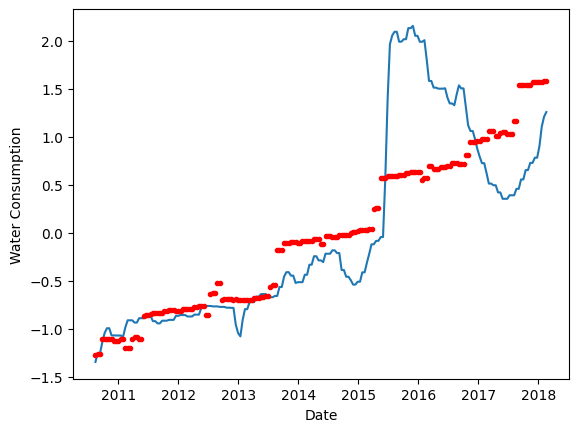

In [109]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], model_multivariate.predict(X2), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

This plot shows the actual water consumption and predicted water consumption. Teh x label has dates in years, and the y label has water consumption. The blue line shows actual water consumption increases from 2011-2015 steadily before a hige spike in 2015 followed by a steep decline 2015 onwards. The red dotted line follows the rise but is unable to account fully for the spikes.

In [110]:
# plt.figure(figsize=(6, 6))
# # Plot predicted vs actual water consumption
# plt.scatter(y, model_multivariate.predict(X1))
# plt.scatter(y, model_multivariate.predict(X2))
# plt.xlabel("Actual Water Consumption")
# plt.ylabel("Predicted Water Consumption")
# plt.title("Predicted vs Actual Water Consumption")
# plt.plot(y, y)
# plt.show()

# CAPTION

which model is better?